In [1]:
%matplotlib inline

In [2]:
import json
import gff3_parsing
from matplotlib import pyplot as plt

In [3]:
'''imports a dictionary and lets us see binding strength of the shine-dalgarno sequences'''
# with open('../Data/examples_for_testing/energyRef_CCUCCU_ensemble.json', 'r') as infile:
#        energy_dict = json.load(infile)
        
with open('../Data/examples_for_testing/energyRef_CCUCCU_mfe.json', 'r') as infile:
       energy_dict = json.load(infile)

In [ ]:
#example of how to see binding strength(must use 6nt length)
energy_dict["ACGAGU"]

In [4]:
new_df, new_genome = gff3_parsing.compile_sequences("../Data/examples_for_testing/ecoli.gff3",\
                                                    "../Data/examples_for_testing/ecoli.fasta", 20)

In [ ]:
new_df.head(10)

In [ ]:
test_string = 'TTACAGAGTACACAACATCC'.replace("T", "U")

In [ ]:
fragment = test_string[7:13]
print(fragment,energy_dict[fragment])

In [ ]:
energy_dict["ACACAA"]

In [ ]:
# for upstream in new_df["upstream_sequence"][:10]:
#     test_string = upstream.replace("T", "U")
#     energy = energy_dict[test_string[9:15]]
    
#     new_df.at[upstream, "energy_binding"] = energy

# new_df.head(10)   

for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy = energy_dict[test_string[9:15]]
    
    new_df.at[index, "energy_binding"] = energy

new_df.tail()

In [ ]:
new_df["energy_binding"].hist()

In [ ]:
fig, ax = plt.subplots()
ax.hist(new_df["energy_binding"])

In [ ]:
test_string = 'TTACAGAGTACACAACATCC'



In [7]:
for index in new_df.index:
    upstream = new_df.loc[index,"upstream_sequence"]
    test_string = upstream.replace("T", "U")
    energy_4gap = energy_dict[test_string[10:16]]
    energy_5gap = energy_dict[test_string[9:15]]
    energy_6gap = energy_dict[test_string[8:14]]
    energy_7gap = energy_dict[test_string[7:13]]
    
    #print(min(energy_4gap,energy_5gap,energy_6gap,energy_7gap))
    new_df.at[index, "energy_binding"] = min(energy_4gap,energy_5gap,energy_6gap,energy_7gap)
    

In [8]:
new_df.head(10)

,genome_id,source,type,start,stop,idk,strand,trash,qualifiers,coding_sequence,upstream_sequence,energy_binding
2,NC_000913.3,RefSeq,CDS,190,255,.,+,0,ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=Un...,ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCA...,TTACAGAGTACACAACATCC,-0.04
4,NC_000913.3,RefSeq,CDS,337,2799,.,+,0,ID=cds-NP_414543.1;Parent=gene-b0002;Dbxref=Un...,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,AAGGTAACGAGGTAACAACC,-2.97
6,NC_000913.3,RefSeq,CDS,2801,3733,.,+,0,ID=cds-NP_414544.1;Parent=gene-b0003;Dbxref=Un...,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,ATGGAAGTTAGGAGTCTGAC,-6.93
8,NC_000913.3,RefSeq,CDS,3734,5020,.,+,0,ID=cds-NP_414545.1;Parent=gene-b0004;Dbxref=Un...,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,CACGAGTACTGGAAAACTAA,-4.29
10,NC_000913.3,RefSeq,CDS,5234,5530,.,+,0,ID=cds-NP_414546.1;Parent=gene-b0005;Dbxref=Un...,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,AATGATAAAAGGAGTAACCT,-6.93
14,NC_000913.3,RefSeq,CDS,5683,6459,.,-,0,ID=cds-NP_414547.1;Parent=gene-b0006;Dbxref=Un...,ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCC...,ATTTCCTGCAAGGACTGGAT,-4.38
16,NC_000913.3,RefSeq,CDS,6529,7959,.,-,0,ID=cds-NP_414548.1;Parent=gene-b0007;Dbxref=Un...,ATGCCAGATTTTTTCTCCTTCATTAACAGCGTCCTTTGGGGATCGG...,CGGCAATAAGAGGGATATGC,-5.79
18,NC_000913.3,RefSeq,CDS,8238,9191,.,+,0,ID=cds-NP_414549.1;Parent=gene-b0008;Dbxref=Un...,ATGACGGACAAATTGACCTCCCTTCGTCAGTACACCACCGTAGTGG...,GTTTAAAGAGAAATACTATC,-1.32
20,NC_000913.3,RefSeq,CDS,9306,9893,.,+,0,ID=cds-NP_414550.1;Parent=gene-b0009;Dbxref=Un...,ATGAATACTTTACGTATTGGCTTAGTTTCCATCTCTGATCGCGCAT...,GTTTAAACGGAAAAATCTTG,-4.42
22,NC_000913.3,RefSeq,CDS,9928,10494,.,-,0,ID=cds-NP_414551.1;Parent=gene-b0010;Dbxref=Un...,ATGGGCAACACTAAGTTGGCTAATCCGGCACCGCTGGGCCTGATGG...,ATGATGATTTTTGAGGAATT,-5.36


(array([266., 384., 653., 740., 509., 489., 405., 255., 376., 302.]),
 array([-8.83 , -7.948, -7.066, -6.184, -5.302, -4.42 , -3.538, -2.656,
        -1.774, -0.892, -0.01 ]),
 <a list of 10 Patch objects>)

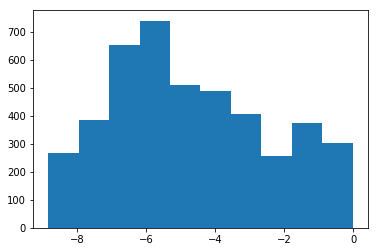

In [9]:
fig, ax = plt.subplots()
ax.hist(new_df["energy_binding"])